### Generating Synthetic Data for Model Accuracy Testing

Creating a synthetic dataset of 250,000 individuals with correctly matched diseases and symptoms is crucial for testing the accuracy of a deep learning model. This large and diverse dataset ensures that the model can learn from various examples, including cases with different numbers of symptoms. By simulating real-world scenarios where a disease might present itself with a range of symptoms, we can evaluate how well the model can predict the correct disease based on input symptoms. A population size of 250,000 is adequate because it provides enough variation and data points for the model to generalize well, making it more robust and accurate in real-world applications.

- **Diversity of Data:** A large dataset allows the model to learn from different scenarios, increasing its ability to generalize and perform well on unseen data.
- **Model Evaluation:** Testing on a dataset of this size ensures that the model's accuracy is assessed over a wide range of possible symptom combinations, which is vital for its reliability.
- **Realistic Training:** By simulating a large population, we mimic real-world conditions, providing a strong foundation for the model to perform accurately when deployed in real-life medical diagnostics.


In [52]:
import pandas as pd
import numpy as np

In [54]:
# Load the dataset
dataset_path = 'resources/dataset.csv'
df = pd.read_csv(dataset_path)


In [56]:
# List of symptom columns
symptom_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
                   'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
                   'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12',
                   'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16',
                   'Symptom_17']


In [58]:
# Identify all unique disease-symptom combinations
unique_combinations = df.dropna(subset=['Disease']).drop_duplicates()

In [60]:
# Set the target number of instances (change this value as needed)
target_instances = 250000  # Example: Adjust this to your desired number

In [62]:
# Calculate the number of unique combinations and instances per combination
num_combinations = len(unique_combinations)
instances_per_combination = target_instances // num_combinations

In [64]:
# Prepare the synthetic data
synthetic_data = []

In [66]:
# Generate instances for each unique disease-symptom combination
for _, combination_row in unique_combinations.iterrows():
    disease = combination_row['Disease']
    symptoms = combination_row[symptom_columns].dropna().tolist()
    
    for _ in range(instances_per_combination):
        # Create a row with the disease and all corresponding symptoms
        row = [disease] + symptoms + [None] * (17 - len(symptoms))
        
        # Append to the synthetic data list
        synthetic_data.append(row)

In [68]:
# Handle any remainder instances due to integer division by distributing them evenly
remaining_instances = target_instances - len(synthetic_data)
combination_indices = list(unique_combinations.index)


In [70]:
# Distribute the remaining instances evenly
for i in range(remaining_instances):
    # Cycle through the unique combinations
    combination_row = unique_combinations.loc[combination_indices[i % num_combinations]]
    disease = combination_row['Disease']
    symptoms = combination_row[symptom_columns].dropna().tolist()
    
    # Create a row with the disease and all corresponding symptoms
    row = [disease] + symptoms + [None] * (17 - len(symptoms))
    
    # Append to the synthetic data list
    synthetic_data.append(row)

In [72]:
# Convert the list to a DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=['Disease'] + symptom_columns)

In [74]:
# Save the generated dataset to the resources folder
synthetic_df.to_csv('resources/synthetic_disease_data.csv', index=False)

## Explore Synthetic Data Diversity

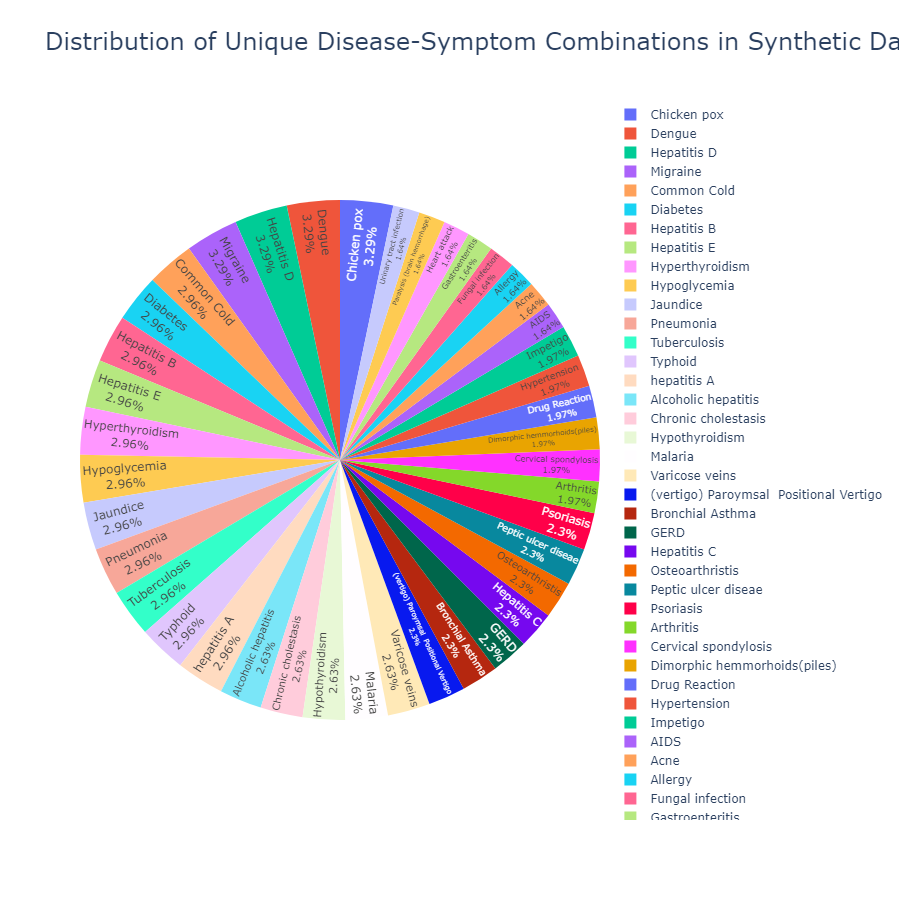

In [89]:
import plotly.express as px

# Load the generated synthetic dataset with specified dtype to avoid mixed types warning
synthetic_data_path = 'resources/synthetic_disease_data.csv'
dtype_dict = {f'Symptom_{i}': str for i in range(1, 18)}
synthetic_df = pd.read_csv(synthetic_data_path, dtype=dtype_dict)

# List of symptom columns
symptom_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
                   'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
                   'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12',
                   'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16',
                   'Symptom_17']

# Drop rows that are identical (for counting unique combinations)
unique_combinations = synthetic_df.drop_duplicates()

# Count the number of unique instances per disease
unique_instances_count = unique_combinations.groupby('Disease').size().reset_index(name='Unique Instances')

# Create an interactive pie chart with Plotly
fig = px.pie(unique_instances_count, 
             names='Disease', 
             values='Unique Instances',
             title='Distribution of Unique Disease-Symptom Combinations in Synthetic Dataset',
             hover_data=['Unique Instances'])

# Update the layout for better visualization and a larger chart
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    width=900,  # Increase the width of the chart
    height=900, # Increase the height of the chart
    title_font_size=24  # Optional: Increase the font size of the title
)

# Show the plot
fig.show()